In [1]:
#import the needed librairies
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/depression_data.csv")

# Data preprocessing steps :

# Step 1 : Data Quality Assesement 

## **Check the data types of the columns** :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [4]:
data = data.drop (["Name"], axis = 1) 

## **Check if there is any duplicated values** :

In [5]:
data.duplicated().sum() #there is no duplicated values in the dataset

np.int64(0)

## Check out the Missing values :

In [6]:
data.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

## Transform the Categorical Values :

In [7]:
#select categorical features
categ_features= data.select_dtypes(include=['object']).columns.tolist() 

In [8]:
categ_features

['Marital Status',
 'Education Level',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

In [9]:
unique_values_count = {col: data[col].nunique() for col in categ_features}
# Print the result
for column, count in unique_values_count.items():
    print(f"Column '{column}' has {count} unique values.")

Column 'Marital Status' has 4 unique values.
Column 'Education Level' has 5 unique values.
Column 'Smoking Status' has 3 unique values.
Column 'Physical Activity Level' has 3 unique values.
Column 'Employment Status' has 2 unique values.
Column 'Alcohol Consumption' has 3 unique values.
Column 'Dietary Habits' has 3 unique values.
Column 'Sleep Patterns' has 3 unique values.
Column 'History of Mental Illness' has 2 unique values.
Column 'History of Substance Abuse' has 2 unique values.
Column 'Family History of Depression' has 2 unique values.
Column 'Chronic Medical Conditions' has 2 unique values.


In [10]:
# Dictionary to store encoders (if needed for inverse transformation later)
label_encoders = {}

# Encoding logic
for col in categ_features:
    unique_count = data[col].nunique()
    if unique_count <= 3:
        # Use LabelEncoder for columns with 3 or fewer unique values
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Save the encoder for later use
    else:
        # Use one-hot encoding for columns with more than 3 unique values
        data = pd.get_dummies(data, columns=[col], prefix=col)

# Display the transformed DataFrame
data

,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
0,31,2,2,0,1,26265.67,2,1,0,1,0,1,1,False,True,False,False,False,True,False,False,False
1,55,1,2,2,0,42710.36,0,2,0,1,0,0,1,False,True,False,False,False,False,True,False,False
2,78,1,2,2,0,125332.79,1,2,1,0,0,1,0,False,False,False,True,False,False,False,True,False
3,58,3,2,1,1,9992.78,2,1,2,0,0,0,0,True,False,False,False,False,False,False,True,False
4,18,0,2,2,1,8595.08,1,1,0,1,0,1,1,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,0,1,1,0,109233.43,1,0,1,0,0,0,0,False,True,False,False,False,False,False,True,False
413764,26,0,0,0,0,96760.97,1,0,2,1,1,0,1,False,False,True,False,False,True,False,False,False
413765,57,0,2,2,0,77353.26,2,1,0,0,0,1,1,False,True,False,False,False,True,False,False,False
413766,71,2,2,2,1,24557.08,2,1,2,0,1,0,0,False,True,False,False,True,False,False,False,False


In [11]:
# Apply log transformation
data['Income'] = data['Income'].apply(lambda x: x**0.5)


In [12]:
data.head()

,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
0,31,2,2,0,1,162.066869,2,1,0,1,0,1,1,False,True,False,False,False,True,False,False,False
1,55,1,2,2,0,206.664849,0,2,0,1,0,0,1,False,True,False,False,False,False,True,False,False
2,78,1,2,2,0,354.023714,1,2,1,0,0,1,0,False,False,False,True,False,False,False,True,False
3,58,3,2,1,1,99.963893,2,1,2,0,0,0,0,True,False,False,False,False,False,False,True,False
4,18,0,2,2,1,92.709654,1,1,0,1,0,1,1,False,False,True,False,False,False,True,False,False


# Why Use Cube Root Transformation?

Cube root transformation is used to reduce the impact of outliers and normalize data distributions. It works by compressing the range of large values while maintaining a more balanced relationship with smaller values compared to log transformation. This makes the data less skewed and easier to model. It is particularly beneficial for:

- *Reducing Skewness*: Many real-world datasets, like income or sales data, are right-skewed, and cube root transformation helps to make the distribution closer to normal.

- *Handling Outliers*: Large values become less extreme after the transformation, but smaller values are preserved better than with log transformation, making it a flexible option for handling data with both small and large values.

- *Improving Model Performance*: Machine learning models often perform better with normalized or symmetric data, as they can detect patterns more effectively.

For example, in the case of income data, the cube root transformation ensures that high-income values are compressed without overly distorting the lower-income values, providing a fairer and more balanced representation across the data range.


<Figure size 1000x600 with 0 Axes>

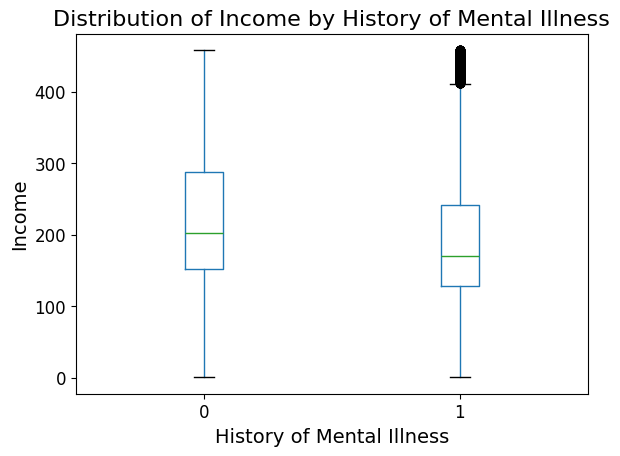

In [13]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Income', by='History of Mental Illness', grid=False)
plt.title("Distribution of Income by History of Mental Illness", fontsize=16)
plt.suptitle("")  # Remove the automatic "by" subtitle
plt.xlabel("History of Mental Illness", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Splitting the data-set into Training and Test Set shape and size.

In [14]:
X = data.drop('History of Mental Illness', axis=1)  # Select features
y = data['History of Mental Illness']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # Split data 80/20

In [15]:
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)
df_train.to_csv("../data/train_data.csv",index=False)
df_test.to_csv("../data/test_data.csv",index=False)